## Consuming data using Kafka and Visualise (20%) .  
In this task, we will implement an Apache Kafka consumer to consume the data from Part 2.  

Important:  
-	In this part, Kafka consumers are used to consume the streaming data published from task 2.8.  
-	This part doesn’t require parallel processing, and please do not use Spark in this part. It’s OK to use Pandas or any Python library to do simple calculations for the visualisation.  

#### Here I have created plots on the predictions

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("FraudAndProductsVisualization").getOrCreate()

# Load fraud counts from the Parquet file 
fraud_df = spark.read.parquet("fraud_predictions_count_parquet").toPandas()

# Load top products from the Parquet file 
top_products_df = spark.read.parquet("top_products_parquet").toPandas()

## 1.	(Basic plot) Plot a diagram with two subplots to show the following:  
a)	Left subplot: Show a bar chart of potential fraud count every 10 seconds(visualise data from 7a);  
b)	Right Subplot: Show a line chart of cumulative sales of top 20 products (non-fraud, sum of product*qty), update every 30 seconds. (visualise data from 7b) .  



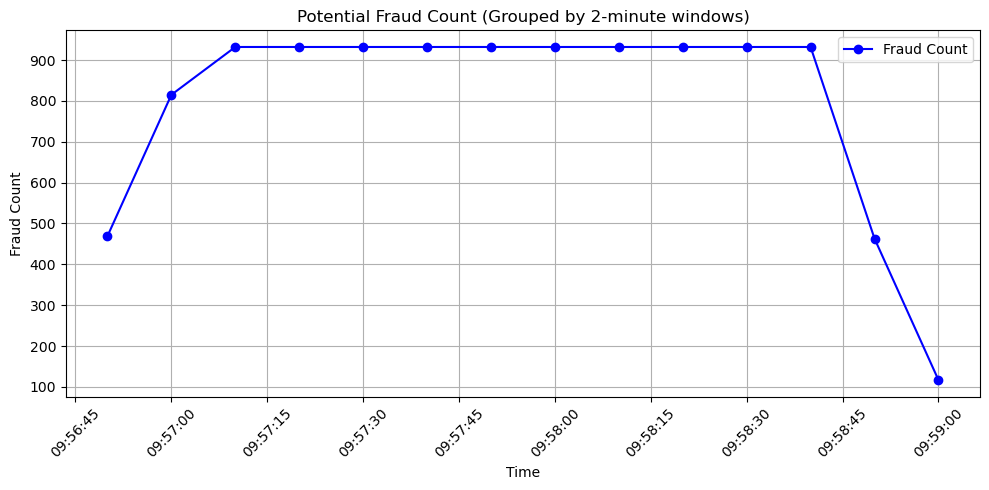

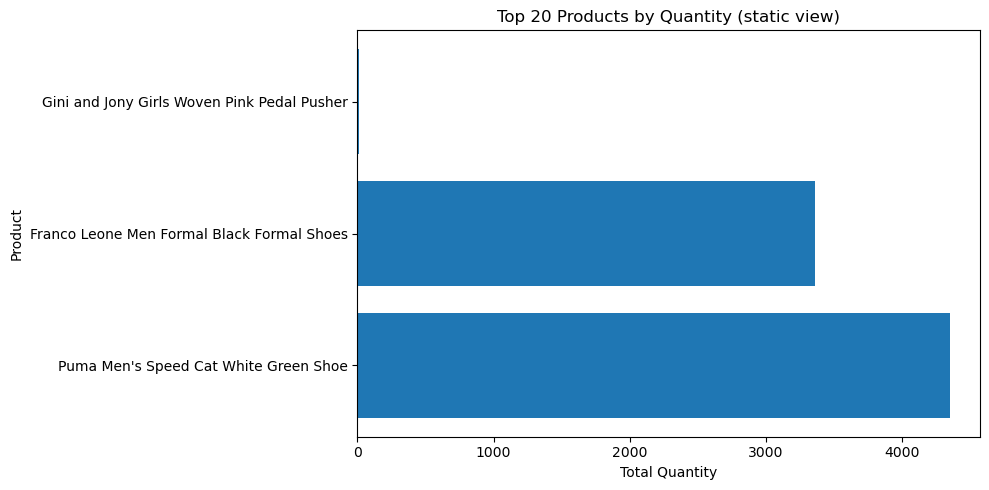

In [7]:
# --- Plot 1: Line chart of potential frauds ---

# Extract the 'start' time from the 'window' struct column for fraud count
fraud_df['timestamp'] = pd.to_datetime(fraud_df['window'].apply(lambda x: x['start']))

# Group the fraud data by timestamp and sum the counts
grouped_fraud = fraud_df.groupby('timestamp')['count'].sum()

# Create the line chart for fraud count
plt.figure(figsize=(10, 5))
plt.plot(grouped_fraud.index, grouped_fraud.values, marker='o', linestyle='-', color='b', label="Fraud Count")
plt.title("Potential Fraud Count (Grouped by 2-minute windows)")
plt.xlabel("Time")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# --- Plot 2: Bar chart of top products ---

# Group the top products by product display name and sum the total quantities
top_products_grouped = top_products_df.groupby('productDisplayName')['total_quantity'].sum()

# Sort the products by quantity
top_products_sorted = top_products_grouped.sort_values(ascending=False).head(20)

# Create the bar chart for top products
plt.figure(figsize=(10, 5))
plt.barh(top_products_sorted.index, top_products_sorted.values)
plt.title("Top 20 Products by Quantity (static view)")
plt.xlabel("Total Quantity")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

### 2.	(Advanced plot, open question) Be creative and create an advanced plot (not a line/bar chart).  
For example, plot a choropleth or bubble map to show where the fraudulent transaction happens the most.  
Choropleth: https://python-graph-gallery.com/choropleth-map/  
Bubble Map: https://python-graph-gallery.com/bubble-map/  
Note: Both plots shall be real-time plots, which will be updated if new streaming data comes in from part 2. 

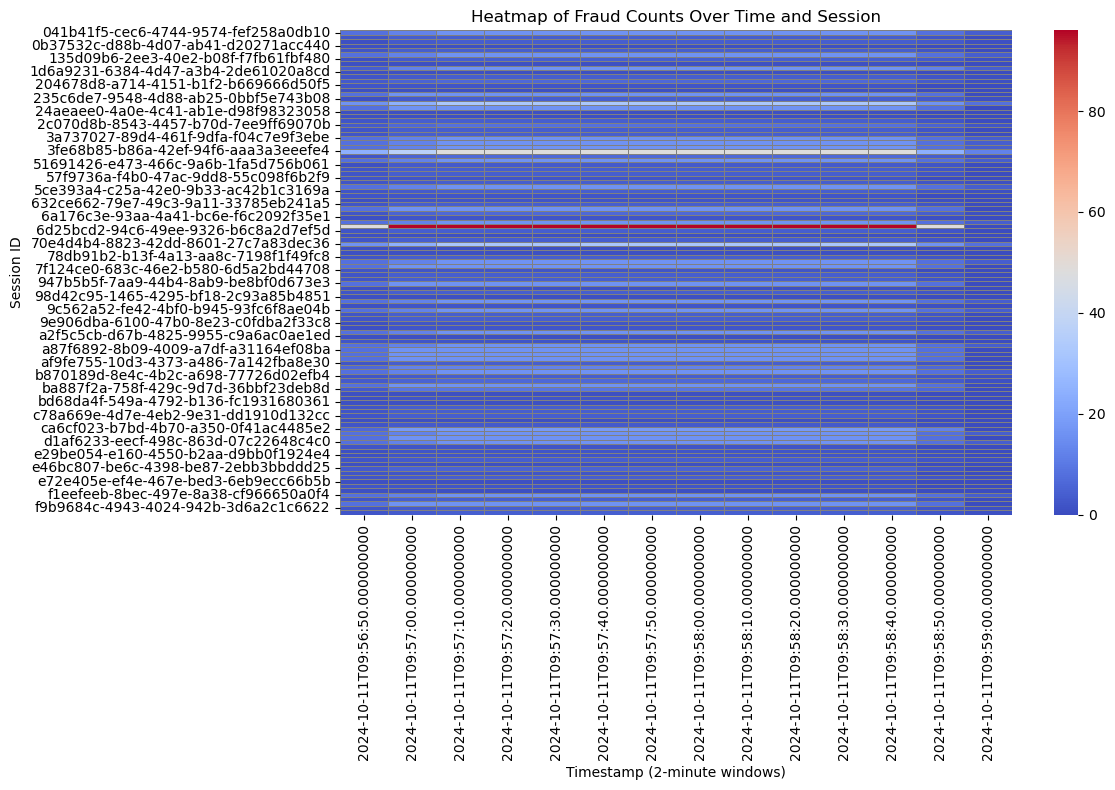

In [10]:
import seaborn as sns

# --- Advanced Plot: Heatmap of Fraud Counts Over Time and Session ---

# Extract the 'start' time from the 'window' struct column for fraud count
fraud_df['timestamp'] = pd.to_datetime(fraud_df['window'].apply(lambda x: x['start']))

# Pivot the data to create a table with session_ids as rows, timestamps as columns, and fraud counts as values
heatmap_data = fraud_df.pivot_table(values='count', index='session_id', columns='timestamp', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, linecolor='gray')

# Set plot labels and title
plt.title("Heatmap of Fraud Counts Over Time and Session")
plt.xlabel("Timestamp (2-minute windows)")
plt.ylabel("Session ID")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Basic Plots: Line and Bar Charts for Fraud Count and Top Products

### Line Chart: Potential Fraud Count (Grouped by 2-Minute Windows)
We visualize the potential fraud count every 10 seconds using a line chart. The fraud counts are grouped by time, and a cumulative line plot is created to show trends in potential frauds over time. 

- The x-axis represents the timestamp (2-minute windows).
- The y-axis shows the total fraud count for each time window.
- A legend is included to denote the "Fraud Count."

### Bar Chart: Top 20 Products by Quantity
The bar chart presents the top 20 products based on the total quantity sold (non-fraud products).

- The x-axis represents the total quantity sold.
- The y-axis lists the top 20 products.
- The products are sorted in descending order based on the quantity.

## Advanced Plot: Heatmap of Fraud Counts Over Time and Session

In this advanced plot, we use a heatmap to visualize the fraud count across different sessions and timestamps.

- The rows represent `session_id` (each session in the data).
- The columns represent `timestamp`, grouped by 2-minute windows.
- The color intensity indicates the number of frauds detected during that session and time window.

This heatmap provides a clear visual representation of which sessions and time periods have higher or lower fraud counts.
